In [1]:
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt

In [2]:
from google.colab.patches import cv2_imshow

In [3]:
import cv2
import numpy as np

# Example frame size
frame_width = 640
frame_height = 480
size = (frame_width, frame_height)

# Create a VideoWriter object
result = cv2.VideoWriter('Simple Pendulum.mp4', cv2.VideoWriter_fourcc(*'MJPG'), 10, size)

# Example: Writing dummy frames into the video
for _ in range(60):  # Create a short video of 60 frames
    # Create a dummy image (you would use actual frames captured from a camera or video file)
    frame = np.random.randint(0, 256, (frame_height, frame_width, 3), dtype=np.uint8)
    result.write(frame)

# Release everything when job is finished
result.release()
print("The video was successfully saved!")


The video was successfully saved!


In [4]:
cap = cv2.VideoCapture('ball_tracking.mp4')
redLower = np.array([0,10,170], dtype='uint8')
redUpper = np.array([50,50,255], dtype='uint8')
c = 0
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

size = (frame_width, frame_height)

while True:
    grapped,frame=cap.read()
    if grapped == True:

        red = cv2.inRange(frame,redLower,redUpper)
        red = cv2.GaussianBlur(red,(3,3),0)

        cnts = cv2.findContours(red.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)

        if len(cnts) > 0:
            cnt = sorted(cnts,key=cv2.contourArea,reverse=True)[0]
            rect = np.int32(cv2.boxPoints(cv2.minAreaRect(cnt)))
            cv2.circle(frame, (rect[0][0]+(rect[-1][0] - rect[0][0])//2,rect[1][1]+(rect[-1][-1]-rect[1][1])//2),
                   25, (0, 255, 0), -1)
        cv2_imshow(frame)
        result.write(frame)
        if cv2.waitKey() & 0xFF == ord("q"):
            break

    else:
        break


# cleanup the camera and close any open windows
cap.release()
cv2.destroyAllWindows()

In [5]:
import cv2
import numpy as np
import imutils
import math

# Open the video file
cap = cv2.VideoCapture('Simple Pendulum.mp4')

# Assuming the pivot is at the top middle of the frame
_, frame = cap.read()
frame_height, frame_width = frame.shape[:2]
x_pivot = frame_width // 2
y_pivot = 0  # Top of the frame

# Arrays to hold time and angle data
times = []
angles = []

frame_number = 0
frame_rate = cap.get(cv2.CAP_PROP_FPS)

redLower = np.array([0, 10, 170], dtype='uint8')
redUpper = np.array([50, 50, 255], dtype='uint8')

while True:
    grabbed, frame = cap.read()
    if not grabbed:
        break

    red = cv2.inRange(frame, redLower, redUpper)
    red = cv2.GaussianBlur(red, (3, 3), 0)
    cnts = cv2.findContours(red.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    if len(cnts) > 0:
        cnt = sorted(cnts, key=cv2.contourArea, reverse=True)[0]
        rect = np.int32(cv2.boxPoints(cv2.minAreaRect(cnt)))
        center_x = rect[0][0] + (rect[-1][0] - rect[0][0]) // 2
        center_y = rect[1][1] + (rect[-1][-1] - rect[1][1]) // 2
        theta = math.atan2(center_x - x_pivot, y_pivot - center_y)  # atan2(x, y) but our frame's y is inverted

        # Store time in seconds and the angle in degrees
        times.append(frame_number / frame_rate)
        angles.append(math.degrees(theta))

    frame_number += 1

cap.release()

# Now you have 'times' and 'angles'



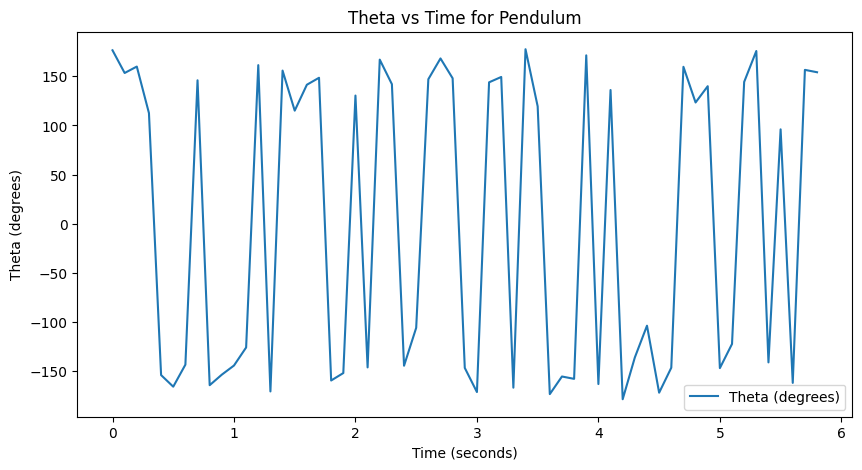

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(times, angles, label='Theta (degrees)')
plt.xlabel('Time (seconds)')
plt.ylabel('Theta (degrees)')
plt.title('Theta vs Time for Pendulum')
plt.legend()
plt.show()
